In [17]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
raw_data_path = "../data/raw"
file_list = glob.glob(raw_data_path + "/*.csv")

In [19]:
file_list

['../data/raw\\1_2024-05-07_23-07.csv',
 '../data/raw\\2_2024-05-07_23-16.csv',
 '../data/raw\\3_2024-05-07_23-23.csv']

In [20]:
main_dataframe = pd.read_csv(file_list[0], delimiter=",")
for i in range(1, len(file_list)):
    data = pd.read_csv(file_list[i], delimiter=",")
    df = pd.DataFrame(data)
    main_dataframe = pd.concat([main_dataframe, df], axis=0)

In [21]:
main_dataframe["url_id"] = main_dataframe["url"].map(lambda x: x.split("/")[-2])
new_dataframe = main_dataframe[["url_id", "total_meters", "price"]].set_index("url_id")

<Axes: >

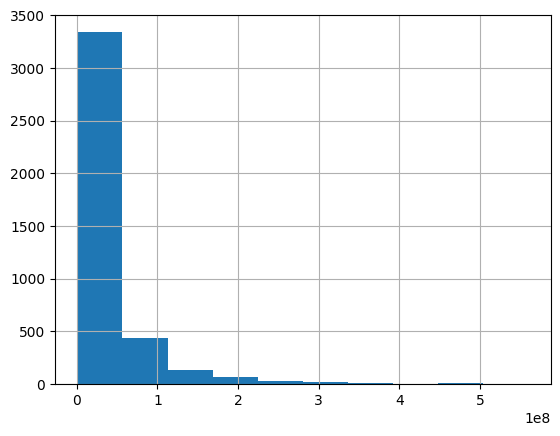

In [22]:
new_dataframe["price"].hist()

In [23]:
new_df = new_dataframe[new_dataframe["price"] < 100_000_000]

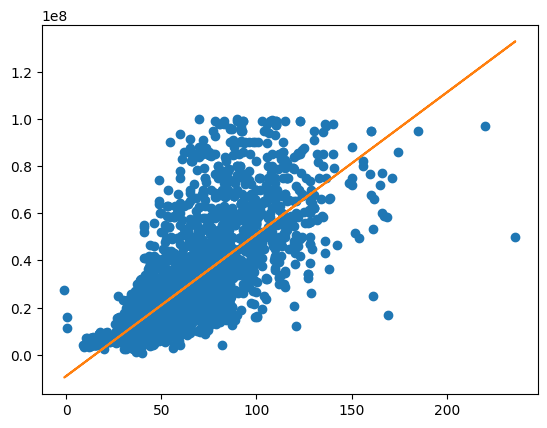

In [24]:
x = new_df["total_meters"]
y = new_df["price"]

plt.plot(x, y, "o")

# obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# add linear regression line to scatterplot
plt.plot(x, m * x + b)